In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

$\textbf{Linear:}$
Usando os dados do Laboratorio de Física III, prática 1, experimento do resistor

In [5]:
data = pd.read_csv("voltagem.csv")
print(data.shape)
data.head()

(10, 2)


,V,I
0,5.0,0.04
1,7.4,0.07
2,8.3,0.08
3,10.1,0.09
4,10.9,0.10


In [9]:
X = data['V'].values
Y = data['I'].values

In [59]:
list_1 = [[1,X[i]] for i in range(len(X))]
#A = []
#A.append(list_1)
#A.append(X)
A_array = np.array(list_1)
Y_array = np.array(Y)
print(A_array)
#print(list_1)
print(Y_array)

[[ 1.   5. ]
 [ 1.   7.4]
 [ 1.   8.3]
 [ 1.  10.1]
 [ 1.  10.9]
 [ 1.  11.4]
 [ 1.  12.4]
 [ 1.  14.9]
 [ 1.  17.5]
 [ 1.  20. ]]
[0.04 0.07 0.08 0.09 0.1  0.11 0.12 0.14 0.17 0.2 ]


In [60]:
A_transpose = np.transpose(A_array)
k = np.dot(A_transpose,A_array)
k_inverse = np.linalg.inv(k)
p = np.dot(k_inverse,A_transpose)
p_vec = np.dot(p,Y_array)
#p_vec = np.dot(Y_array, p)
print(p_vec)

[-0.00991051  0.01034016]


In [63]:
x_fun = np.array(range(-10,100)) 
y_fun =  x_fun*p_vec[1] + p_vec[0]

(0, 0.3)

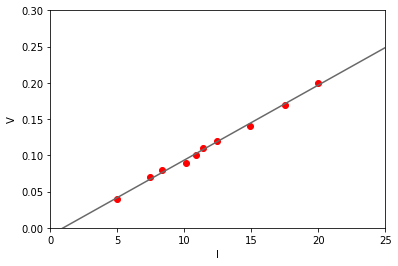

In [71]:
plt.scatter(X,Y_array, color = 'r')
plt.plot(x_fun,y_fun, color = 'dimgrey')
plt.xlabel("I")
plt.ylabel("V")
#plt.label("Corrente X Potencial")
plt.xlim(0,25)
plt.ylim(0,0.3)

$\textbf{Não Linear:}$ experimento do Led azul

In [82]:
data = pd.read_csv("led.csv")
data.head()

,Corrente (mA),Voltagem (V)
0,0.000,1.52
1,0.003,1.58
2,0.008,1.63
3,0.016,1.66
4,0.029,1.69


In [89]:
Y = data['Corrente (mA)'].values
X = data['Voltagem (V)'].values

In [90]:
list_1 = [[1,X[i]] for i in range(len(X))]
A_array = np.array(list_1)
Y_array = np.array(Y)
print(A_array)
print(Y_array)

[[1.   1.52]
 [1.   1.58]
 [1.   1.63]
 [1.   1.66]
 [1.   1.69]
 [1.   1.71]
 [1.   1.73]
 [1.   1.75]
 [1.   1.77]
 [1.   1.79]
 [1.   1.82]
 [1.   1.84]
 [1.   1.85]]
[0.    0.003 0.008 0.016 0.029 0.044 0.065 0.1   0.157 0.29  0.509 0.837
 1.14 ]


In [91]:
A_transpose = np.transpose(A_array)
k = np.dot(A_transpose,A_array)
k_inverse = np.linalg.inv(k)
p = np.dot(k_inverse,A_transpose)
p_vec = np.dot(p,Y_array)
#p_vec = np.dot(Y_array, p)
print(p_vec)

[-4.44362475  2.72896695]


In [103]:
x_fun = np.array(range(-10,100)) 
#y_fun = []
y_fun =  p_vec[0]*(np.exp(x_fun*p_vec[1]))
#for i in range(len(x_fun)):
#    y_function = p_vec[0]*(np.exp(x_fun*p_vec[1]))
#    y_fun.append(y_function)

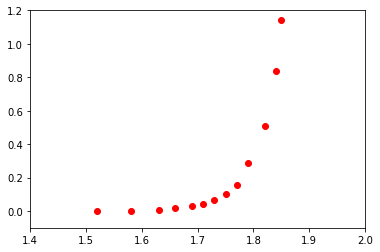

In [115]:
#plt.plot(x_fun,y_fun)
plt.scatter(X,Y, color = 'r')
plt.ylim(-0.1,1.2)
plt.xlim(1.4,2)
plt.show()